---
# ***Práctica 4: Ecuación Korteweg-de-Vries (KdV)***
---

##### Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Para graficar
from tqdm import tqdm # Barra de progreso

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Compu

# Seteamos parámetros que vamos a utilizar para graficar
plt.rcParams.update({
    'axes.labelsize': 15, # Variables de los ejes,
    'xtick.labelsize': 12, # Coordenadas eje x,
    'ytick.labelsize': 12, # Coordenadas eje y,
    'legend.fontsize': 12, # Leyenda
    'axes.prop_cycle': plt.cycler('color', ['blue', 'red', 'green', 'orange']), # Color
    'axes.grid': True, # Cuadricula
    'figure.figsize': (5,5), # Tamaño
    'animation.embed_limit': 500.0
})

## Enunciado:

La ecuación KdV es una ecuación diferencial en derivadas parciales que sirve como modelo de, entre otras cosas, aguas poco profundas. Fue introducida por primera vez por Boussinesq en 1877 como una nota y redescubierta por Diederik Korteweg y Gustav de Vries en 1895. Esta está dada por la expresión:

$$ \partial_t u + u \partial_x u + \beta \,\partial_x^3 u = 0,$$

$\bf a)$ Pruebe analíticamente la conservación del momento $P = \int u dx$ y  de la energía $E = \int u^2 dx$.

$\bf b)$ Notando que el estado estacionario es con $u$ constante, calcule la relación de dispersión de ondas linealizando. ¿Qué tipo de ondas son las que encuentra?  


$\bf c)$ Busque la solución de ondas viajeras $u(x-vt) = u (y)$. Para eso, primero note que $u_t = -v u_t$. Escriba el sistema como una ecuación de segundo orden integrando (Note que la presencia de una simetría $v \rightarrow v + w$ y $u \rightarrow u + w$ antes de integrar permite anular la constante de integración), realice una analogía con una ecuación del movimiento como las que conoce de mecánica newtoniana ($\ddot{x} = - \frac{dV}{dx}$, interprete el tiempo como $x$ y el espacio como $u$) e interprete (grafique el potencial para hacerlo). Discuta la existencia de un único solitón y de un trén de solitones.

$\bf d)$ Escriba un integrador con método pseudoespectral para la ecuación KdV usando Runge-Kutta de orden 2 midpoint para el paso temporal. Hágalo en un recinto de tamaño $2  \ pi$ con condiciones de contorno periódicas y $N = 128$ puntos de grilla. Note que el término $\beta u_{xxx}$, en caso ser dominante exige $dt < \frac{\Delta x^3}{\beta}$. (puede usar un N mayor cuidando el dt para que se cumpla la condición de estabilidad)

$\bf e)$ Sabiendo que la expresión de un solitón está dada por:

$$ u(x,t) = 3 \, v \, \text{cosh}^{-2} \left[ \sqrt{\frac{v}{4 \beta}} (x  - v t) \right]$$

coloque un solitón como condición inicial, calcule su velocidad en función del tiempo y compare con lo que espera. Escriba una condición de dos solitones, uno rápido y uno lento. ¿Se afectan el uno al otro?

$\bf f)$ Del método de scattering inverso se encuentra que usando la transformación

$$ u  = - 6 \beta \left( \lambda + \frac{\psi_{xx}}{\psi}\right)$$

entonces $u$ será una solución de KdV si $\psi$ es solución de la ecuación de Schrödinger con un potencial $V = \frac{-u}{6 \beta}$. Dado el potencial, los lugares donde hayan pozos representan la existencia de estados ligados y resultarán en la emisión de solitones.

Elija una condición inicial, grafique el potencial y vea cómo se emiten solitones desde la zona esperada. Chequee las cantidades conservadas del comienzo.

$\bf g)$ Dada una condición inicial arbitraria, explore la recurrencia de la evolución del sistema. ¿Qué conclusiones obtiene del mismo? (pueden ver https://doi.org/10.1103/PhysRevLett.15.240)

(Sugerencia: Use $\beta = 0.022$ y $dt = 5e-5$ e integre por tiempos muy largos)

## Item a) (terminado)

Para resolver este ítem procedemos de la siguiente manera:

### Conservación del Momento Lineal

Para probar la conservación del momento lineal, integramos directamente la ecuación KdV con respecto a $x$ en el intervalo $[0,L]$:

\begin{align*}
  \int_0^L \left[{\partial_t u(x,t) + u(x,t) \partial_x u(x,t) + \beta \partial_x^3 u(x,t)}\right] \; \text{d}x &= 0 \\
  \text{Para facilitar la notación y lectura, omitimos las variables } (x,t) \text{, entonces:} \\
  \int_0^L \left({\partial_t u + u \partial_x u + \beta \partial_x^3 u}\right) \; \text{d}x &= 0 \\
  \text{Por linealidad, y como } \partial_x (u^2) = 2 u \partial_x u \text{ (por la regla de la cadena), tenemos que:} & \\
  \partial_t \left({\int_0^L u \; \text{d}x}\right) + \frac{1}{2} \int_0^L \partial_x (u^2) \; \text{d}x + \beta \int_0^L \partial_x (\partial_x^2 u) \; \text{d}x &= 0 \\
  \text{Por la definición propuesta del momento } P \text{, y por el teorema fundamental del cálculo:} \\
  \partial_t P(t) + \frac{1}{2} [u(L,t)^2 - u(0,t)^2] + \beta [\partial_x^2 u(L,t) - \partial_x^2 u(0,L)] &= 0 \\
  \text{Si la función } u(x,t) \text{ es periódica en el intervalo } [0,L] ⇒ u(0,t) = u(L,t) \text{ (y sus derivadas), por lo tanto:} \\
  \partial_t P(t) + 0 + \beta. (0) &= 0 \\
  \partial_t P(t) &= 0 \\
  ⟹ P &= \text{cte}
\end{align*}

Por lo tanto, acabamos de concluir que:

$\boxed{\text{Si } u(x,t) \text{ es periódica en } x \text{, el momento lineal } P = \int u \;\text{d}x \text{ se conserva, es decir: } P(t) = P = \text{cte}.} \quad \blacksquare$

### Conservación de la Energía Mecánica

Para probar la conservación de la energía mecánica, comenzamos por multiplicar a la ecuación KdV por $u$:

\begin{align*}
  u \cdot \left({\partial_t u + u \partial_x u + \beta \partial_x^3 u}\right) &= u \cdot 0 \\
  u \partial_t u + u^2 \partial_x u + \beta u \partial_x^3 u &= 0 \\
  \text{Como } \left\{{\begin{array}{l} \partial_t (u^2) = 2 u \partial_t u \\ \partial_x (u^3) = \partial_x (u^2 \cdot u) = 2u^2 \partial_x u + u^2 \partial_x u = 3u^2 \partial_x u \\ \partial_x (u \partial_x^2 u) = u \partial_x^3 u + (\partial_x u) (\partial_x^2 u) \end{array}}\right. \text{, tenemos que:} & \\
  \frac{1}{2} \partial_t (u^2) + \frac{1}{3} \partial_x (u^3) + \beta \left[{\partial_x (u \partial_x^2 u) - (\partial_x u) (\partial_x^2 u)}\right] &= 0 \\
  \text{Como } \partial_x [(\partial_x u)^2] = \partial_x [(\partial_x u)(\partial_x u)] = (\partial_x^2 u) (\partial_x u) + (\partial_x u) (\partial_x^2 u) = 2 (\partial_x u) (\partial_x^2 u) \text{, tenemos que:} & \\
  \frac{1}{2} \partial_t (u^2) + \frac{1}{3} \partial_x (u^3) + \beta \partial_x (u \partial_x^2 u) - \frac{\beta}{2} \partial_x [(\partial_x u)^2] &= 0 \\
  \text{Integrando con respecto a } x \text{ en el intervalo } [0,L] \text{, tenemos que:} \\
  \int_0^L \left\{{\frac{1}{2} \partial_t (u^2) + \frac{1}{3} \partial_x (u^3) + \beta \partial_x (u \partial_x^2 u) - \frac{\beta}{2} \partial_x [(\partial_x u)^2]}\right\} \;\text{d}x &= 0 \\
  \text{Por linealidad de la integral, tenemos que:} & \\
  \frac{1}{2} \partial_t \int_0^L (u^2) \;\text{d}x + \frac{1}{3} \int_0^L \partial_x (u^3) \;\text{d}x + \beta \int_0^L \partial_x (u \partial_x^2 u) \;\text{d}x - \frac{\beta}{2} \int_0^L \partial_x [(\partial_x u)^2] \;\text{d}x &= 0 \\
  \text{Por la definición propuesta de energía } E \text{, y por el teorema fundamental del cálculo:} & \\
  \frac{1}{2} \partial_t E(t) + \frac{1}{3} \left[{u(L,t)^3 - u(0,t)^3}\right] + \beta \left[{u(L,t) \partial_x^2 u(L,t) - u(0,t) \partial_x^2 u(0,t)}\right] - \frac{\beta}{2} \left\{{[\partial_x u(L,t)]^2 - [\partial_x u(0,t)]^2}\right\}  &= 0 \\
  \text{Si la función } u(x,t) \text{ es periódica en el intervalo } [0,L] ⇒ u(0,t) = u(L,t) \text{, por lo tanto:} \\
  \frac{1}{2} \partial_t E(t) + 0 + \beta. (0) + \beta. (0) &= 0 \\
  \partial_t E(t) &= 0 \\
  ⟹ E &= \text{cte}
\end{align*}

Por lo tanto, acabamos de concluir que:

$\boxed{\text{Si } u(x,t) \text{ es periódica en } x \text{, la energía mecánica } E = \int u^2 \;\text{d}x \text{ se conserva, es decir: } E(t) = E = \text{cte}.} \quad \blacksquare$

## Item b) (terminado)

En este ítem, se pide hallar la relación de dispersión de la ecuación KdV linealizando. Para ello, procedemos de la siguiente manera:

### Relación de Dispersión

Primero, calculamos la relación de dispersión de nuestro sistema:

* En primer lugar, recordamos la expresión de la ecuación KdV del enunciado:

$$\partial_t u(x,t) + u(x,t) \partial_x u(x,t) + \beta \partial_x^3 u(x,t) = 0$$

* Ahora, proponemos que el campo de velocidades $u(x,t)$ en el estado estacionario, va como la suma de un término constante $u_0$ (la velocidad en el estacionario) y una perturbación que depende de la posición y el tiempo $\delta u(x,t)$, de la forma:

$$u(x,t) = u_0 + \delta u(x,t)$$

* Reemplazando en nuestra ecuación diferencial, tenemos que:

\begin{align*}
  \partial_t u(x,t) + u(x,t) \partial_x u(x,t) + \beta \partial_x^3 u(x,t) &= 0 \\
  \partial_t [u_0 + \delta u(x,t)] + [u_0 + \delta u(x,t)] \partial_x [u_0 + \delta u(x,t)] + \beta \partial_x^3 [u_0 + \delta u(x,t)] &= 0 \\
  \text{Por la linealidad de la derivada y distribuyendo, tenemos que:} & \\
  \partial_t u_0 + \partial_t [\delta u(x,t)] + u_0 \partial_x u_0 + u_0 \partial_x [\delta u(x,t)] + \delta u(x,t) \partial_x u_0 + \delta u(x,t) \partial_x [\delta u(x,t)] + \beta \partial_x^3 u_0 + \beta \partial_x^3 [\delta u(x,t)] &= 0 \\
  \text{Como } u_0 \text{ es constante, tenemos que:} \\
  0 + \partial_t [\delta u(x,t)] + u_0. (0) + u_0 \partial_x [\delta u(x,t)] + \delta u(x,t) . (0) + \delta u(x,t) \partial_x [\delta u(x,t)] + \beta . (0) + \beta \partial_x^3 [\delta u(x,t)] &= 0 \\
  \partial_t [\delta u(x,t)] + 0 + u_0 \partial_x [\delta u(x,t)] + 0 + \delta u(x,t) \partial_x [\delta u(x,t)] + 0 + \beta \partial_x^3 [\delta u(x,t)] &= 0 \\
  \partial_t [\delta u(x,t)] + u_0 \partial_x [\delta u(x,t)] + \delta u(x,t) \partial_x [\delta u(x,t)] + \beta \partial_x^3 [\delta u(x,t)] &= 0 \\
\end{align*}

* Para linealizar la expresión, despreciamos los términos que sean de orden cuadrático o superior, es decir, aquello que contengan dos términos en $\delta u(x,t)$:

$$\delta u(x,t) \partial_x [\delta u(x,t)] \sim \cal{O}(\delta u(x,t)^2) \xrightarrow{t\to \infty} \mathbf{0} $$

* Descartando este término cuadrático, tenemos que:

$$\partial_t [\delta u(x,t)] + u_0 \partial_x [\delta u(x,t)] + \beta \partial_x^3 [\delta u(x,t)] = 0$$

* Ahora, para hallar la relación de dispersión de ondas, proponemos que la perturbación $\delta u(x,t)$ es una onda plana unidimensional con número de onda $k$ y frecuencia angular $\omega$, de la forma:

$$\delta u(x,t) = \text{Re}\left\{{\delta u_0 e^{i(kx-\omega t)}}\right\}$$

* Y calculamos las derivadas temporales y espaciales que vamos a necesitar para nuestra ecuación KdV:

\begin{align*}
  \frac{\partial}{\partial t} \delta u(x,t) &= \text{Re}\left\{{ \frac{\partial}{\partial t} \left[{\delta u_0 e^{i(kx-\omega t)}}\right]}\right\} & \frac{\partial}{\partial x} \delta u(x,t) &= \text{Re}\left\{{ \frac{\partial}{\partial x} \left[{\delta u_0 e^{i(kx-\omega t)}}\right]}\right\} & \frac{\partial^2}{\partial x^2} \delta u(x,t) &= \frac{\partial}{\partial x} \left[{\frac{\partial}{\partial x} \delta u(x,t)}\right] & \cdots \\
  &= \text{Re}\left\{{(- i\omega) \delta u_0 e^{i(kx-\omega t)}}\right\} & &= \text{Re}\left\{{(ik) \delta u_0 e^{i(kx-\omega t)}}\right\} & &= \text{Re}\left\{{ \frac{\partial}{\partial x} \left[{(ik) \delta u_0 e^{i(kx-\omega t)}}\right]}\right\} \\
  & & & & &=\text{Re}\left\{{(ik)^2 \delta u_0 e^{i(kx-\omega t)}}\right\} \\
\end{align*}

* Reemplazando en la ecuación KdV, tenemos que:

\begin{align*}
  \partial_t [\delta u(x,t)] + u_0 \partial_x [\delta u(x,t)] + \beta \partial_x^3 [\delta u(x,t)] &= 0 \\
  \text{Re} \left\{{(-i\omega) \delta u_0 e^{i(kx-\omega t)} + u_0 (ik) \delta u_0 e^{i(kx-\omega t)} + \beta (ik)^3 \delta u_0 e^{i(kx-\omega t)}}\right\} &= 0 \\
  \text{Como } i^3 = -i \text{, sacando factor común, tenemos que:} \\
  \text{Re} \left\{{\left[{-\omega + k u_0 - \beta k^3}\right] i \delta u_0 e^{i(kx-\omega t)}}\right\} &= 0 \\
  \Leftrightarrow -\omega + k u_0 - \beta k^3 = 0 \\
  \omega(k) = u_0k - \beta k^3
\end{align*}

* Es decir, acabamos de obtener que la relación de dispersión de ondas planas en una dimensión para la ecuación KdV es de la forma:

$\boxed{\omega(k) = u_0k - \beta k^3}$

### Propagación de Ondas: Ondas Dispersivas

Para terminar, podemos recordar que por ejemplo, la relación de dispersión de ondas planas electromagnéticas es de la forma:

$$\omega(k) = ck,$$

donde $c$ es la velocidad de la luz y $k$ el número de onda.

Esta relación de dispersión es lineal, pues la velocidad de fase es $v_{\phi} = c$, y ésta coincide con la velocidad de grupo:

$$v_{\text{g}} := \frac{\partial \omega(k)}{\partial k} = c.$$

Como la velocidad de fase coincide con la velocidad de grupo, las ondas son NO dispersivas, es decir, el paquete de ondas no se deforma a medida que se propaga.

Para la relación de dispersión que obtuvimos nosotros, obtuvimos este mismo término: $\omega(k) = u_0k$ más un término extra, por lo que la relación puede pensarse como un término lineal más un término no lineal. En nuestra relación de dispersión general, la velocidad de fase no coincide con la velocidad de grupo, por lo que las ondas de nuestro sistema serán **dispersivas**: se deforman a medida que se propagan.



## Item c) (terminado)

Para realizar este ítem procedemos de la siguiente manera:

### Resolución (terminado)

#### Solución de Onda Viajera

* En primer lugar, proponemos que la dependencia funcional de $u$ con sus variables $(x,t)$ en la ecuación KdV son soluciones de ondas viajeras, realizando el cambio de variables:

$$\boxed{y(x,t) = x - vt}$$

* De esta forma, la ecuación KdV resulta:

\begin{align*}
  \partial_t u(x,t) + u(x,t) \partial_x u(x,t) + \beta \partial_x^3 u(x,t) &= 0 \\
  \text{Efectuamos la sustitución:} \\
  \frac{\partial}{\partial t} u[y(x,t)] + u[y(x,t)] \frac{\partial}{\partial x} u[y(x,t)] + \beta \frac{\partial^3}{\partial x^3} u[y(x,t)] &= 0 \\
\end{align*}

* Ahora, efectuamos la regla de la cadena en cada término:

\begin{align*}
  \frac{\partial}{\partial t} u[y(x,t)] &= \frac{\text{d}u}{\text{d}y} [y(x,t)] \frac{\partial y(x,t)}{\partial t} & \frac{\partial}{\partial x} u[y(x,t)] &= \frac{\text{d}u}{\text{d}y} [y(x,t)] \frac{\partial y(x,t)}{\partial x} & \frac{\partial^2}{\partial x^2} u[y(x,t)] &= \frac{\partial}{\partial x} \left\{{\frac{\partial}{\partial x} u[y(x,t)] }\right\} & \cdots \\
  \text{Como } &y = x-vt \text{, entonces:} & \text{Como } &y = x-vt \text{, entonces:} & \text{Por la } &\text{derivada primera:} \\
  &= -vu'(y) & &= u'(y).1 & &= \frac{\text{d}u'}{\text{d}y} [y(x,t)] . \frac{\partial y(x,t)}{\partial x} \\
  & & &= u'(y) & &= u''(y).1 \\
  & & & & &= u''(y)
\end{align*}

$\quad$ Por lo tanto: $\left\{{\begin{array}{l} \frac{\partial}{\partial t} u[y(x,t)] = -vu'(y) \\ \frac{\partial}{\partial x} u[y(x,t)] = u'(y) \\ \frac{\partial^3}{\partial x^3} u[y(x,t)] = u'''(y) \end{array}}\right.$

* Reemplazando las derivadas en la ecuación KdV, tenemos que:

\begin{align*}
  \partial_t u + u \partial_x u + \beta \partial_x^3 u &= 0 \\
  -vu'(y) + u(y)u'(y) + \beta u'''(y) &= 0 \\
  \text{Como } \text{d}_y [u(y)^2] = \text{d}_y [u(y)u(y)] = [\text{d}_y u(y)] u(y) + [\text{d}_y u(y)] u(y) &= 2u(y)u'(y) \text{, tenemos:} \\
  -v\text{d}_y u(y) + \frac{1}{2} \text{d}_y [u(y)^2] + \beta \text{d}_y u''(y) &= 0 \\
  \frac{\text{d}}{\text{d} y} \left[{-v u(y) + \frac{1}{2} u(y)^2 + \beta u''(y)}\right] &= 0 \\
  ⇔ -v u(y) + \frac{1}{2} u(y)^2 + \beta u''(y) &= \text{cte}
\end{align*}

Es decir, acabamos de probar que para ondas viajeras, la función $u$ y sus respectivos términos son constantes, cuando siguen la forma funcional dada por la ecuación diferencial:

$\quad \boxed{-v u(y) + \frac{1}{2} u(y)^2 + \beta u''(y) = \text{cte}}$

#### Transformación de Simetría


* Ahora, de acuerdo a lo que propone el enunciado, vamos a realizar una transformación de simetría para las variables $u$ y $v$, de la forma:

$\quad \left\{{\begin{array}{l} v \to \tilde{v} + w \\ u(y) \to \tilde{u}(y) + w \end{array}}\right.$

* Efectuando esta transformación en nuestra ecuación de ''conservación'' para $u$, tenemos que:

\begin{align*}
  \frac{\text{d}}{\text{d} y} \left[{-v u(y) + \frac{1}{2} u(y)^2 + \beta u''(y)}\right] &= 0 \\
  \frac{\text{d}}{\text{d} y} \left\{{-(\tilde{v}+w) [\tilde{u}(y)+w] + \frac{1}{2} [\tilde{u}(y)+w]^2 + \beta \text{d}_y^2 [\tilde{u}(y)+w]}\right\} &= 0 \\
  \text{Distribuyendo, desarrollando el binomio y derivando, tenemos que:} \\
  \frac{\text{d}}{\text{d} y} \left\{{-\tilde{v}\tilde{u}(y) - w\tilde{u}(y) - \tilde{v}w - w^2 + \frac{1}{2} \tilde{u}(y)^2 + w\tilde{u}(y) + \frac{1}{2} w^2 + \beta [\text{d}_y^2 \tilde{u}(y) + 0]}\right\} &= 0 \\
  \text{Agrupando y cancelando términos, tenemos:} \\
  \frac{\text{d}}{\text{d} y} \left[{-(\tilde{v}+w)\tilde{u}(y) + \frac{1}{2} \tilde{u}(y)^2 + \beta \text{d}_y^2 \tilde{u}(y) - \tilde{v}w - \frac{1}{2}w^2}\right] &= 0 \\
  \text{Como } \tilde{v} + w = v \text{, tenemos que:} \\
  \frac{\text{d}}{\text{d} y} \left[{-v\tilde{u}(y) + \frac{1}{2} \tilde{u}(y)^2 + \beta \tilde{u}''(y) - \tilde{v}w - \frac{1}{2}w^2}\right] &= 0 \\
\end{align*}

* Podemos notar que la primera ecuación desde la cual partimos es idéntica a la última, a menos de la constante $C = -\tilde{v}w - \frac{1}{2}w^2$, pero como se cumple que:

\begin{align*}
  \frac{\text{d}}{\text{d} y} \left[{-v u(y) + \frac{1}{2} u(y)^2 + \beta u''(y)}\right] &= \frac{\text{d}}{\text{d} y} \left[{-v\tilde{u}(y) + \frac{1}{2} \tilde{u}(y)^2 + \beta \tilde{u}''(y) - \tilde{v}w - \frac{1}{2}w^2}\right] = 0 \\
  \text{Esto se cumple automáticamente } &\text{si se satisface la condición: } \\
  C &= -\tilde{v}w -\frac{1}{2}w^2 = 0
\end{align*}

Por lo tanto: $\boxed{C = -\tilde{v}w -\frac{1}{2}w^2 = 0} \quad \blacksquare$

Es decir, acabamos de probar que ante la transformación de simetría que definimos anteriormente la forma funcional de $u$ en nuestra ecuación de ''conservación'' no cambia a menos de una constante $C$ por lo que podemos fijarla a cero.

#### Analogía con la Segunda Ley de Newton

Debido a que probamos que la constante de nuestra expresión de ''conservación'' para la ecuación KdV es nula, ahora podemos reescribirla como una ecuación de movimiento para la variable $y$ realizando la siguiente analogía:

* Consideramos la analogía:

  $\left\{{\begin{array}{l} y \sim t \\ u \sim x \end{array}}\right. ⟹ u(y) = x(t)$

* Ahora reescribimos nuestra ecuación diferencial:
\begin{align*}
  0 &= -v u(y) + \frac{1}{2} u(y)^2 + \beta u''(y) \\
  u''(y) &= -\frac{1}{\beta} \left[{\frac{1}{2} u(y)^2 - vu(y)}\right] \\
  \text{Como } \ddot{x}(t) = -\frac{\text{d}V(x)}{\text{d}x} &\text{, proponemos un potencial:} \\
  - \frac{\text{d}V(u)}{\text{d}u} &= -\frac{1}{\beta} \left[{\frac{1}{2} u(y)^2 - vu(y)}\right] \\
  \text{Si fijamos el potencial } &V(u=u_0) = 0 \text{, integrando tenemos que:} \\
  V(u) &= \int \frac{1}{\beta} \left[{\frac{1}{2} u(y)^2 - v u(y)}\right] \; \text{d}u(y)\\
  &= \frac{1}{\beta} \left[{\frac{1}{6} u(y)^3 - \frac{v}{2} u(y)^2}\right] \\
  &= \frac{1}{2\beta} \left[{\frac{1}{3} u(y)^3 - vu(y)^2}\right] \\
\end{align*}

Por lo tanto, al realizar la analogía de nuestra ecuación diferencial obtenida a partir de ondas viajeras con la segunda ley de Newton para la variable $u(y)$, tenemos que nuestra ecuación se rige por un potencial $V(u)$, de la forma:

$\boxed{V(u) = \frac{1}{2\beta} \left[{\frac{1}{3} u(y)^3 - vu(y)^2}\right]}$

### Gráfico del potencial

Ahora, graficamos el potencial que obtuvimos en la celda anterior, para unos parámetros $v$ y $\beta$ arbitrarios:

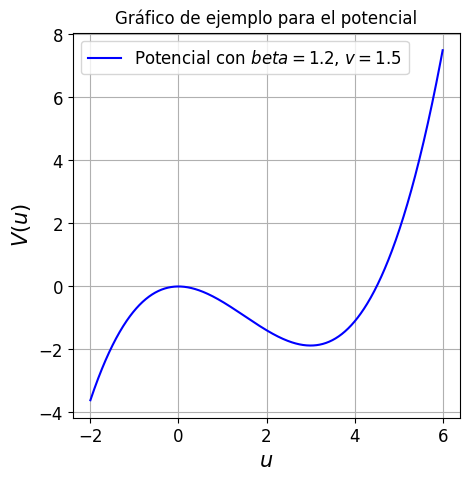

In [ ]:
def potencial(beta,v,u): # Definimos nuestra función potencial
  return (1/(2*beta)) * ((1/3) * u**3 - v * u**2)

u = np.linspace(-2,6,1000) # Generamos un eje x

beta=1.2 # Definimos parámetros arbitrarios
v=1.5
# Graficamos
plt.plot(u,potencial(beta,v,u), label='Potencial con $beta = 1.2$, $v = 1.5$')
plt.title('Gráfico de ejemplo para el potencial')
plt.xlabel('$u$')
plt.ylabel('$V(u)$')
plt.legend()
plt.show()

En general, un solitón se define como un paquete de ondas solitario que es fuertemente estable y se propaga sin deformarse en un medio no lineal. En analogía con el potencial $V(u)$, los solitones se producirán cuando se tienen estados ligados. Por ejemplo, en el gráfico de nuestro potencial con parámetros arbitrarios, entre $u=0$ y aproximadamente $u=4.25$, se producirá un solitón aislado cuando la energía corresponda a $V(u)=0$, y se producirá un tren de solitones cuando ésta corresponda al intervalo entre la región mayor al mínimo del potencial (aproximadamente $-1.9$) y $0$.

## Item d) (terminado)

Para hacer este ítem, escribimos un método pseudo-espectral utilizando RK2 como en las guías anteriores, de la forma:

In [ ]:
beta = 0.022 # Utilizamos el factor beta que propone la sugerencia

x_max = 2 * np.pi # Definimos el máximo del intervalo (enunciado)
N = 128 # Condiciones iniciales del enunciado
dx = x_max / N
x = np.linspace(0, x_max, N,endpoint=False)

t_max = 10
dt = 5e-5# Paso temporal del enunciado
M = int(t_max / dt)
t = np.linspace(0, t_max, M)

In [ ]:
# La función evolución realiza RK2 para nuestra solución de la EDP
def step(u, k, beta, N, dt):
  f = np.fft.rfft(u) # f es la FFT de la función u
  ft = f.copy()
  for ord in [2, 1]: # Método de Runge-Kutta de orden 2
    D = dt / ord
    f = ft - D * (-1j * beta * k**3 * f + fnl(f, k)) # Aparece la unidad imaginaria i por la derivada cubo
    f[int(N / 3):] = 0 # Dealiasing (eliminamos modos espúreos)
  return np.fft.irfft(f) # volvemos a u (antitransformamos la FFT)

# Esta función computa el término no lineal de Burgers en el espacio de Fourier
def fnl(f, k): # Término no lineal
  fx = 1j * k * f
  v = np.fft.irfft(f) # Antitransformamos f
  vx = np.fft.irfft(fx) # Antitransformamos fx
  return np.fft.rfft(v * vx) # Hacemos FFT del producto

def evol(U0, N=N, M=M):
  k = np.arange(0,N/2+1)
  U = np.zeros((N,M)) # Creamos un vector de ceros de 512 puntos
  U[:,0] = U0 # Condición inicial
  for i in tqdm(np.arange(M-1)): # Evolución temporalmente
    U[:,i+1] = step(U[:, i], k, beta, N, dt) # Hacemos RK2
  return U

## Item e) (terminado)

Para resolver este ítem procedemos de la siguiente forma:

### Un Solitón

Primero estudiamos un único solitón:

In [ ]:
# Definimos una función que representa al solitón:

def init_soliton(x, t, v): # Por enunciado
  return 3 * v * (np.cosh(np.sqrt(v/(4*beta)) * (x - v*t)))**-2

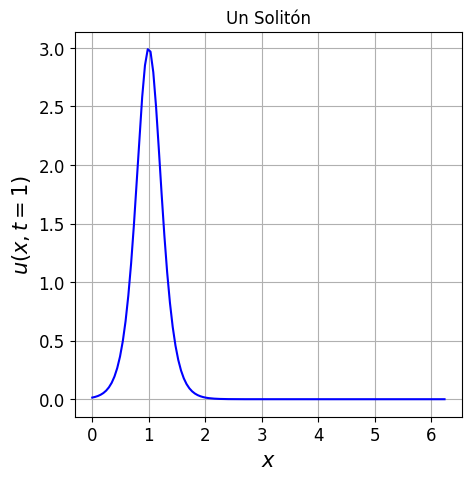

In [ ]:
# Graficamos y lo desfasamos respecto del origen para que su forma esté completamente definida
U0 = init_soliton(x, 1, v=1) # Condición inicial, elegimos v=1
plt.plot(x, U0) # Graficamos para un t=1 fijo
plt.title('Un Solitón')
plt.xlabel('$x$')
plt.ylabel('$u(x,t=1)$')
plt.show()

Ahora evolucionamos nuestra ecuación KdV imponiendo al solitón único como condición inicial:

In [ ]:
U = evol(U0) # Evolución

100%|██████████| 199999/199999 [00:26<00:00, 7456.90it/s]


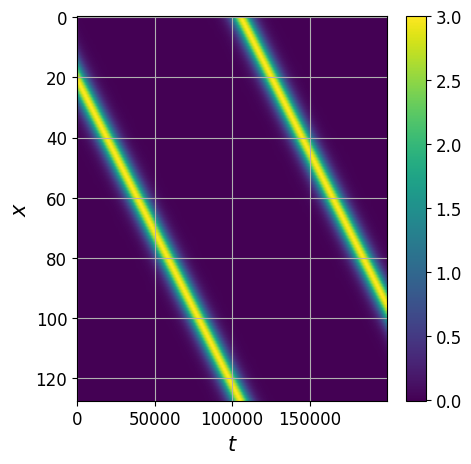

In [ ]:
# Graficamos en mapa de calor
plt.imshow(U, aspect='auto')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.colorbar()

Podemos notar que el solitón se desplaza en el espacio a medida que transcurre el tiempo. Por periodicidad, vemos que para tiempos mayores a 100000 aparece el ''eco'' del solitón de la condición inicial.

### Cálculo de Velocidad

Ahora, vamos a calcular la velocidad de este solitón. Por el mapa de calor de la celda anterior, debido a que el gráfico es $x$ (volteado) contra $t$, la velocidad del solitón automáticamente estará dada por dicha pendiente. Para comprobarlo matemáticamente, hacemos lo siguiente:

Extraemos la posición $x$ que corresponde al máximo del solitón (su pico), a medida que éste se desplaza en el tiempo. Para ello, buscamos los tiempos que llamamos t_max (en total serán 128, el valor de $N$) que corresponden al tiempo asociado a la posición del máximo del solitón, para cada valor de $t$, de la forma:

In [ ]:
t_max = t[np.argmax(U, axis=1)] # Tiempo asociado a la posición en x del máximo

Ahora, graficamos los puntos $x$ máximos con respecto a sus tiempos $t$ máximos, y calculamos su respectiva derivada. Dicha derivada corresponderá a la velocidad del solitón.

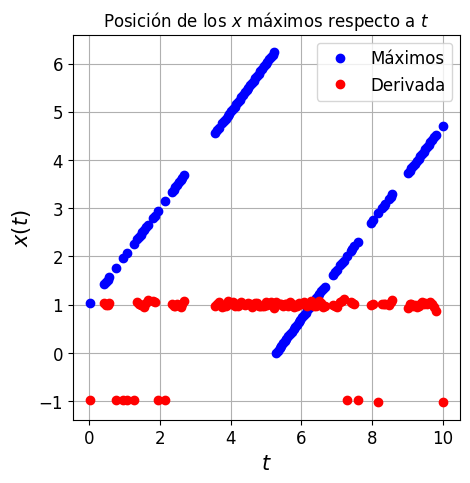

In [ ]:
x_dot = np.gradient(x, t_max) # Derivamos

plt.plot(t_max, x, 'o', label = 'Máximos')
plt.plot(t_max, x_dot, 'o', label = 'Derivada')
plt.title('Posición de los $x$ máximos respecto a $t$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend()

Podemos ver que la derivada de la posición del solitón respecto al tiempo da 1, valor que coincide con el valor de la velocidad $v=1$ que seteamos en la condición inicial de nuestro solitón.
Observamos que aparecen valores de la derivada del solitón cuyo valor es $-1$, que corresponden al solitón de ''eco'' que notamos anteriormente.

#### **Observación**

A continuación  podemos notar cómo el solitón que definimos como condición inicial se repite periódicamente en el espacio, lo cual explica la aparición de nuestro solitón ''eco''.

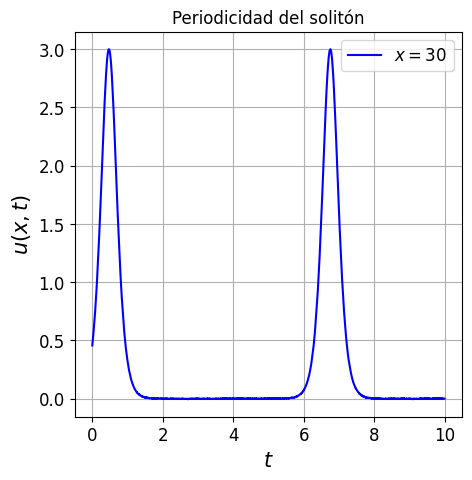

In [ ]:
plt.plot(t, U[30, :], label = '$x=30$') # Graficamos para x = 30 de 128 contra t
plt.title('Periodicidad del solitón')
plt.xlabel('$t$')
plt.ylabel('$u(x,t)$')
plt.legend()
plt.show()

### Dos Solitones

Finalmente, vemos la dinámica que resulta en nuestra ecuación KdV cuando imponemos como condición inicial la suma de dos solitones: uno rápido y uno lento.

In [ ]:
# Elegimos astutamente valores de t y v para evitar superposición a tiempo inicial
U0_slow = init_soliton(x, 4.2, v=1.1) # Solitón lento
U0_fast = init_soliton(x, 1, v=1.8) # Solitón rápido

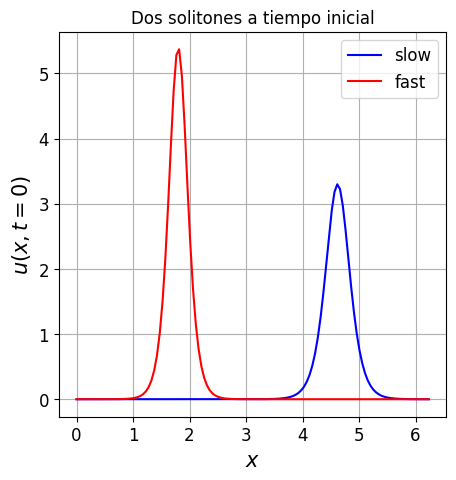

In [ ]:
# Graficamos
plt.plot(x, U0_slow, label='slow')
plt.plot(x, U0_fast, label='fast')
plt.title('Dos solitones a tiempo inicial')
plt.xlabel('$x$')
plt.ylabel('$u(x,t=0)$')
plt.legend()
plt.show()

Evolucionamos la ecuación KdV con nuestro método pseudo-espectral para la condición inicial que corresponde a la suma de ambos solitones: el solitón lento y el rápido:

In [ ]:
U = evol(U0_slow + U0_fast)

100%|██████████| 199999/199999 [00:30<00:00, 6594.43it/s]


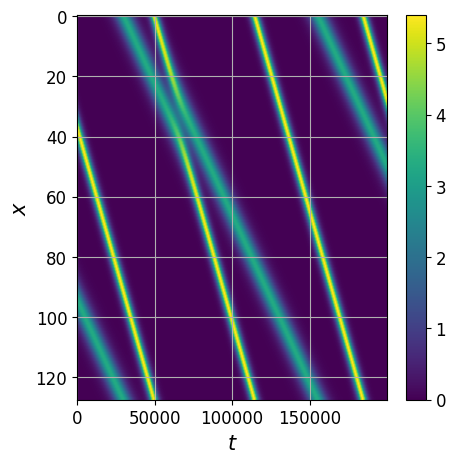

In [ ]:
# Graficamos
plt.imshow(U, aspect='auto')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.colorbar()

En primer lugar, observamos que el solitón rápido, debido a los parámetros que escogimos nosotros corresponde a aquél cuyo máximo (pico) es el más grande de los dos. En el mapa de calor, esto corresponde al solitón cuyo color es más amarillo.

En segundo lugar, en nuestro mapa de calor vemos que ambos solitones (el amarillo: el rápido, y el celeste: el lento) viajan con distintas velocidades, lo que se traduce en distintas pendientes.

Luego, vemos que esta diferencia de pendientes se traduce en una superposición de los solitones. En aquellas posiciones en las que se intersecan los solitones, tenemos que éstos interactúan, y luego siguen su camino respetando sus pendientes originales. En la interacción, éstos ''no se tocan'', pues el mapa de calor está prácticamente marcando el cero (prácticamente en violeta). La interacción no alteró la trayectoria de ambos solitones.

## Item f) (terminado)

Para hacer este ítem, procedemos como sugiere el enunciado:

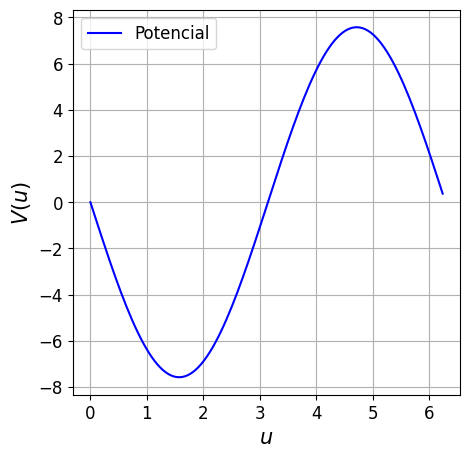

In [ ]:
def V(u, beta=beta): # Definimos la función potencial
  return -u/(6*beta)

U0 = np.sin(x) # Elegimos una condición inicial arbitraria

plt.plot(x, V(U0), label = 'Potencial') # Graficamos el potencial respecto de u (nuestro x)
plt.xlabel('$u$')
plt.ylabel('$V(u)$')
plt.legend()
plt.show()

In [ ]:
U = evol(U0) # Evolucionamos con la condición inicial elegida

100%|██████████| 199999/199999 [00:30<00:00, 6626.87it/s]


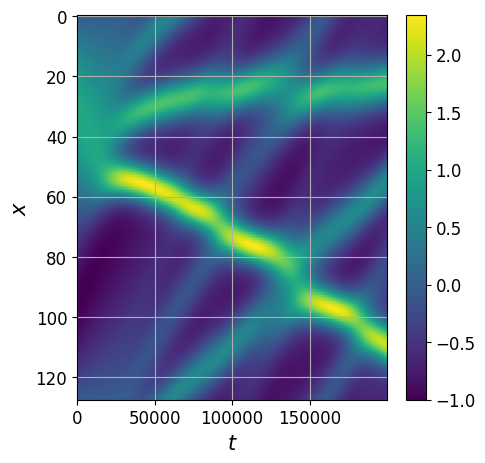

In [ ]:
# Graficamos en mapa de calor
plt.imshow(U, aspect='auto')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.colorbar()
plt.show()

El comportamiento es el esperado. De acuerdo a nuestra condición inicial, los estados ligados se producen en la primera mitad del intervalo de $x$ (en la mitad superior del mapa de calor y en la mitad izquierda del potencial), y los estados no ligados corresponden a la parte convexa del potencial (mitad derecha del potencial). Vemos que en el mapa de calor, allí donde se encuentran los estados ligados: mitad superior del mapa (notar que $x$ es creciente hacia abajo), se producen trenes de solitones que se desplazan en el tiempo y viajan con distintas velocidades. En la parte inferior de estados no ligados no se producen solitones.

Adicionalmente, vemos que los solitones producidos interactúan con otros solitones provenientes de estados ligados anteriores o posteriores, que corresponden a la periodicidad del comportamiento de la solución y de la condición inicial. Como antes, estos solitones interactúan, y tras la interacción sus velocidades no se ven afectadas.

## Item g) (terminado)

En este ítem, se propone elegir una condición inicial arbitraria y explorar la recurrencia del sistema a lo largo de su evolución. Entonces, procedemos de la siguiente forma:

In [ ]:
U0 = np.cos(x) # Condición inicial arbitraria
U = evol(U0, M = int(100/dt)) # Aumentamos el tiempo de evolución y evolucionamos el sistema

100%|██████████| 1999999/1999999 [04:28<00:00, 7453.40it/s]


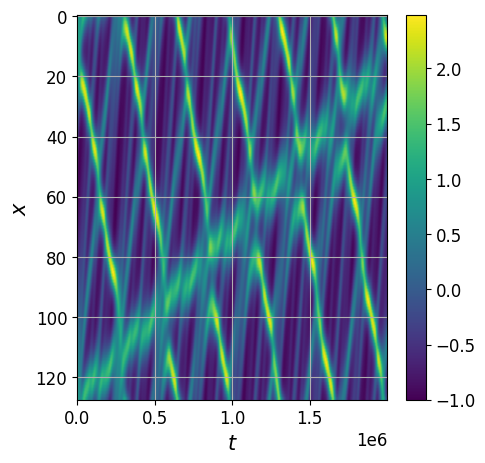

In [ ]:
# Graficamos en mapa de calor
plt.imshow(U, aspect='auto')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.colorbar()
plt.show()

Vemos que la solución se repite periódicamente para tiempos lo suficientemente largos, apareciendo ''ecos'' de solitones con la misma pendiente (se propagan con la misma velocidad). Notamos la aparición de otros solitones y estructuras periódicas. Atribuímos esta forma ondulatoria y compleja del mapa de calor a la condición inicial cosenoidal, cuya evolución no es intuitiva para nada intuitiva en la ecuación KdV.

---
#